<a href="https://colab.research.google.com/github/MuhammadHassan667410/CodeAlpha_Tasks/blob/main/Heart_Disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# Disease Prediction (Heart) – CodeAlpha Internship Task 4
# Author: Muhammad Hassan
# Internship: CodeAlpha – Machine Learning Internship
# Task: Predict whether a patient has heart disease using ML
# ===============================

# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [3]:
# Step 2: Load Dataset
df = pd.read_csv("/content/sample_data/heart.csv")

# First look at the data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Step 3: Dataset Overview
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


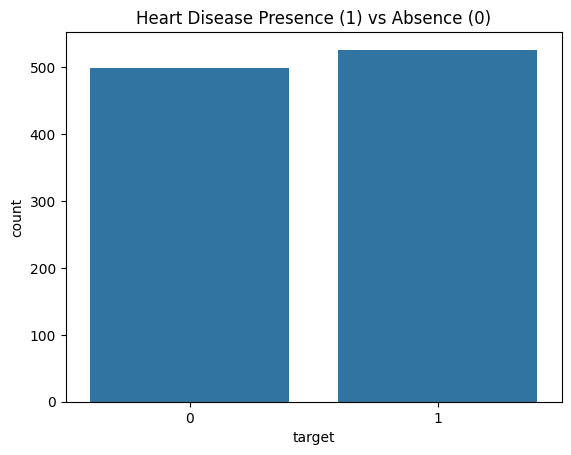

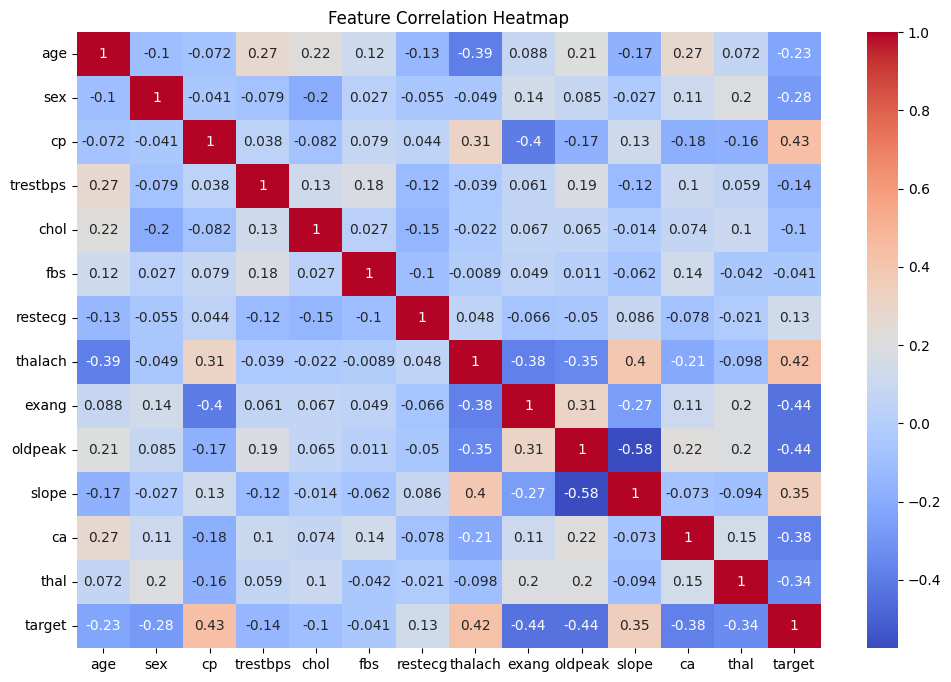

In [5]:
# Step 4: Exploratory Data Analysis (EDA)

# Class distribution
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Step 5: Feature and Target Separation
X = df.drop('target', axis=1)
y = df['target']


In [7]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Step 8: Model Training and Evaluation Function
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, "predict_proba") else None

    print(f"Model: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    if roc_auc:
        print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", cr)
    print("-"*50)
    return acc


In [10]:
# Step 9: Comparing Multiple Models
models = [
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GradientBoostingClassifier(), "Gradient Boosting"),
    (SVC(probability=True), "Support Vector Classifier"),
    (KNeighborsClassifier(), "K-Nearest Neighbors")
]

results = {}
for model, name in models:
    results[name] = evaluate_model(model, name)


Model: Logistic Regression
Accuracy: 0.7951
ROC-AUC Score: 0.8787

Confusion Matrix:
 [[73 29]
 [13 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9854
ROC-AUC Score: 1.0000

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

-------------------------------------

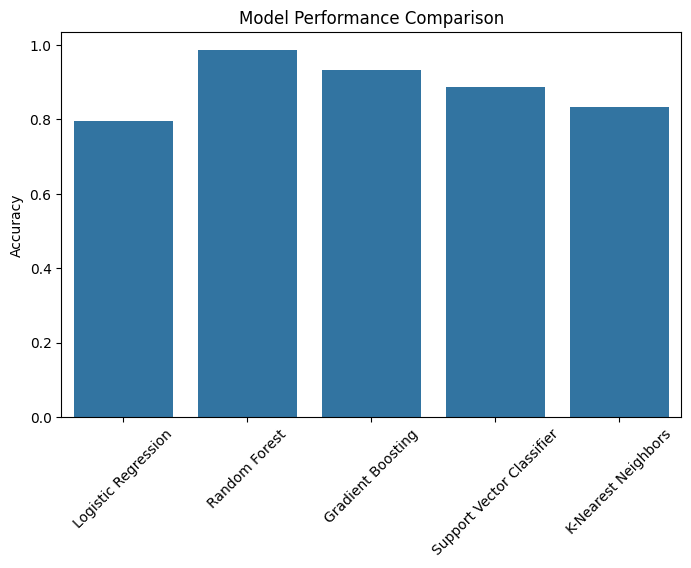

In [11]:
# Step 10: Model Performance Comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [12]:
# Step 11: Cross-Validation on Best Model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name}")

best_model = [m for m, name in models if name == best_model_name][0]
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.4f}")


Best Model: Random Forest
Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Score: 0.9971


In [13]:
# Step 12: Final Conclusion
print(f"The best performing model is: {best_model_name} with accuracy {results[best_model_name]:.4f}.")


The best performing model is: Random Forest with accuracy 0.9854.
